# Project: Investigate a Dataset - [Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


## In this project, I will analyze a  data set contains information about 10,000 movies collected from The Movie Database (TMDb). I will look into the common attributes among movies that lead to high revenues. Then, provide suggestions for the film producers to make succesful movies in the future.


#### Columns Description
##### id: movie's ID
##### imdb_id:  movie's ID on IMDB website
##### popularity: movie's popularity
##### budget: movie's budget	
##### revenue: movie's revenue
##### original_title: movie's name
##### cast: movie's actors
##### homepage: movie's website
##### director: movie's director
##### tagline: movie's tagline
##### overview: movie's overview
##### runtime: movie's duration
##### genres: movie's genres
##### production_companies: movie's production companies
##### release_date: movie's release date
##### vote_count: movie's votes count
##### vote_average: movie's votes average
##### release_year: movie's release year
##### budget_adj: movie's budget in terms of 2010 dollars, accounting for inflation over time
##### revenue_adj: movie's revenue in terms of 2010 dollars, accounting for inflation over time








## Questions for Analysis



## Main question: What leads to movies with high revenues? 
#### Sub questions:    
###                               1- Is there a relation between the movie's popularity and its revenue?
###                               2- Is there a relation between the movie's runtime and its revenue?
###                               3- Is there a relation between the movie's genre and its revenue?
###                               4- Is there a relation between the movie's cast and its revenue?


## Main question: When and who produced the movies with the highest revenues ever?

#### Sub questions:         
###                          5- Which year has the highest annual revenue?
###                          6- Which company is the most common among movies in this year?
###                          7- What are the most common genres among movies in this year?

In [438]:
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [439]:
df = pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [440]:
df.info()            #Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### There are missing values in cast, genres and production_companies

### Note: There are also missing values in homepage, director, tagline, keywords and overview
### but I will be focusing on the columns I need for my analysis which are cast, genres and production_companies

### Data Cleaning

In [441]:
df= df[[
          'id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
          'runtime', 'genres', 'production_companies', 'release_year'
    
       ]]

df.head()                                           #Creating a new dataframe that contains the columns I need for the analysis

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


In [442]:
df.isnull().sum()           #Checking for missing values

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
runtime                    0
genres                    23
production_companies    1030
release_year               0
dtype: int64

In [443]:
df.dropna(inplace= True)      # Dropping rows with missing values

In [444]:
df.isnull().sum()             # Checking that rows with null values got deleted

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
runtime                 0
genres                  0
production_companies    0
release_year            0
dtype: int64

In [445]:
print('Shape:', df.shape)
print('Size:', df.size)      #Checking the shape and size of dataframe

Shape: (9792, 10)
Size: 97920


In [446]:
df.dtypes   #Checking data types

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
runtime                   int64
genres                   object
production_companies     object
release_year              int64
dtype: object

In [447]:
df.sample(1)  #Checking the actual values in a row and compare them to the displayed data type above to make sure that each column has the correct data type

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
6757,2357,0.375934,0,580527,10 Items or Less,Paz Vega|Morgan Freeman|Bobby Cannavale|Anne D...,81,Comedy|Drama,Revelations Entertainment|Mockingbird Pictures...,2006


## Another way to check data types by using a function

In [448]:
def Check_dtype(df):
  sample = pd.DataFrame(df.sample(1))          ## Selecting a random row from the dataframe
  dtype = pd.DataFrame(df.dtypes).transpose()  ## Creating a dataframe of one row contains the data type of each column
  return pd.concat([sample, dtype])            ## Adding the random row with the datatypes in one dataframe

In [449]:
Check_dtype(df)               #Creating a function that shows the values in each column and also its data type in the second row

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
2171,27569,0.375979,31000000,15134293,Extraordinary Measures,Harrison Ford|Brendan Fraser|Keri Russell|Cour...,105,Drama,Double Feature Films|CBS Films,2010
0,int64,float64,int64,int64,object,object,int64,object,object,int64


<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1 : 
## Is there a relation between the movie's popularity and its revenue?

In [450]:
df = df[df['revenue'] > 0]                  #dropping movie rows with revenue below or equal zero  (unrealistic revenue values)

In [451]:
df.shape  #Checking the dataset shape now

(4752, 10)

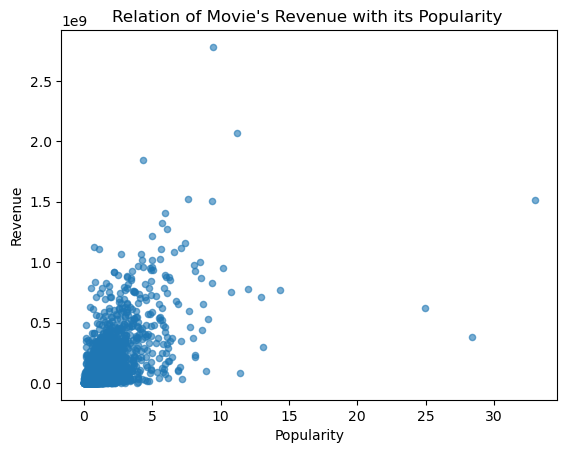

In [452]:
revenue_and_popularity_Plot = df.plot.scatter(x = 'popularity', y = 'revenue', alpha= 0.6, title="Relation of Movie's Revenue with its Popularity ");
revenue_and_popularity_Plot.set_xlabel("Popularity");
revenue_and_popularity_Plot.set_ylabel("Revenue");      #Visualization of popularity and revenue

### There is no significant correlation between the movie's popularity and its revenue

## Research Question 2 : 
## Is there a relation between the movie's runtime and its revenue?

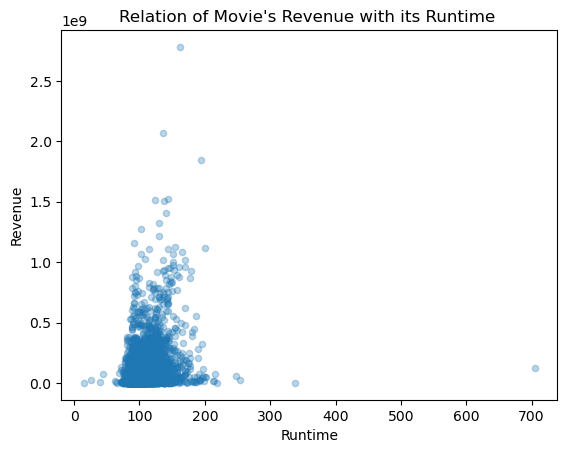

In [453]:
revenue_and_runtime_Plot = df.plot.scatter(x = 'runtime', y = 'revenue', alpha= 0.3, title="Relation of Movie's Revenue with its Runtime ");
revenue_and_runtime_Plot.set_xlabel("Runtime");
revenue_and_runtime_Plot.set_ylabel("Revenue");      #Visualization of runtime and revenue

### There is no significant correlation between the movie's runtime and its revenue

## Research Question 3 : 
## Is there a relation between the movie's genre and its revenue?

In [454]:
df.sample(5)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
3553,58428,0.604152,750000,78396,The Innkeepers,Sara Paxton|Pat Healy|Kelly McGillis|George Ri...,102,Horror|Thriller,Glass Eye Pix|Dark Sky Films,2011
3636,9364,0.414629,8000000,100915,Wuthering Heights,Kaya Scodelario|James Northcote|Amy Wren|Nicho...,129,Drama|Romance,Ecosse Films|Film4 Productions,2011
663,82702,3.489106,145000000,609123048,How to Train Your Dragon 2,Jay Baruchel|Gerard Butler|Kristen Wiig|Jonah ...,102,Fantasy|Action|Adventure|Animation|Comedy,DreamWorks Animation|Mad Hatter Entertainment,2014
4766,78571,0.204794,0,540152,Being Flynn,Robert De Niro|Julianne Moore|Paul Dano|Olivia...,102,Drama,Depth of Field|Tribeca Productions|Focus Featu...,2012
2037,44113,0.791799,22000000,9479718,Stone,Frances Conroy|Robert De Niro|Edward Norton|Mi...,105,Drama,Stone Productions|Mimran Schur Pictures,2010


In [455]:
low_revenue = df[df['revenue'] < df['revenue'].mean()]         #Creating a dataframe contains the movies with low revenues
low_revenue                                         

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015
28,314365,4.062293,20000000,88346473,Spotlight,Mark Ruffalo|Michael Keaton|Rachel McAdams|Lie...,128,Drama|Thriller|History,Participant Media|Open Road Films|Anonymous Co...,2015
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015
35,264644,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015
...,...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,131,Drama,Chenault Productions,1966
10828,5780,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,128,Mystery|Thriller,Universal Pictures,1966
10829,6644,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,120,Action|Western,Paramount Pictures|Laurel Productions,1966
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,1966


In [456]:
genre_of_low_revenue = low_revenue['genres'].str.split('|', expand=True) 
genre_of_low_revenue                                                    #Splitting genres in different columns by removing pipes

,0,1,2,3,4
12,Drama,Science Fiction,None,None,None
28,Drama,Thriller,History,None,None
30,Mystery,Drama,None,None,None
35,Drama,Thriller,None,None,None
36,Crime,Drama,Mystery,None,None
...,...,...,...,...,...
10822,Drama,None,None,None,None
10828,Mystery,Thriller,None,None,None
10829,Action,Western,None,None,None
10835,Action,Adventure,Drama,War,Romance


In [457]:
genre_of_low_revenue.rename(columns = {0 :'genre 1', 1:'genre 2',
                              2:'genre 3', 3:'genre 4', 4:'genre 5'}, inplace = True)
genre_of_low_revenue                                                                 # Changing column names to be readible

,genre 1,genre 2,genre 3,genre 4,genre 5
12,Drama,Science Fiction,None,None,None
28,Drama,Thriller,History,None,None
30,Mystery,Drama,None,None,None
35,Drama,Thriller,None,None,None
36,Crime,Drama,Mystery,None,None
...,...,...,...,...,...
10822,Drama,None,None,None,None
10828,Mystery,Thriller,None,None,None
10829,Action,Western,None,None,None
10835,Action,Adventure,Drama,War,Romance


In [458]:
genre_1 = genre_of_low_revenue['genre 1']

genre_2 = genre_of_low_revenue['genre 2']

genre_3 = genre_of_low_revenue['genre 3']

genre_4 = genre_of_low_revenue['genre 4']

genre_5 = genre_of_low_revenue['genre 5']

In [459]:
genres_of_low_revenue = pd.DataFrame(pd.concat([genre_1, genre_2, genre_3, genre_4, genre_5]))
genres_of_low_revenue               # Creating a dataframe with one column that contains all genres of movies with low revenues

,0
12,Drama
28,Drama
30,Mystery
35,Drama
36,Crime
...,...
10822,None
10828,None
10829,None
10835,Romance


In [460]:
genres_of_low_revenue.rename(columns = {0 :'genres_of_low_revenues'}, inplace = True)
genres_of_low_revenue                                                               # Changing the column name to be readible

,genres_of_low_revenues
12,Drama
28,Drama
30,Mystery
35,Drama
36,Crime
...,...
10822,None
10828,None
10829,None
10835,Romance


In [461]:
genres_of_low_revenue.dropna(inplace= True)    #Deleting the rows with null values

In [462]:
genres_of_low_revenue.isnull().sum()          #Checking that rows with missing values got deleted

genres_of_low_revenues    0
dtype: int64

In [463]:
genres_of_low_revenue.shape   #Checking the dataframe shape now

(8679, 1)

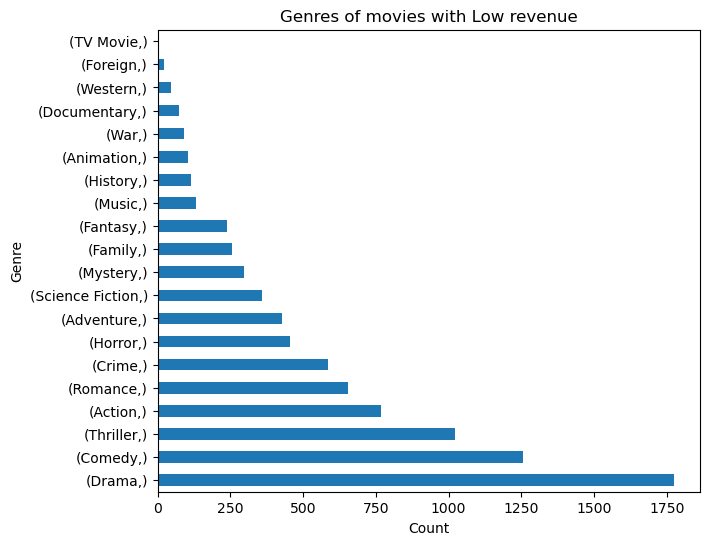

In [464]:
genres_of_low_revenue_Plot = genres_of_low_revenue.value_counts().plot(kind= 'barh',  title='Genres of movies with Low revenue', figsize= (7,6));  
genres_of_low_revenue_Plot.set_xlabel("Count");
genres_of_low_revenue_Plot.set_ylabel("Genre");                                                  #Visualization of movies' genres with low revenues

### It seems that movies with low revenues are mostly Drama, Comedy and Thriller

In [465]:
high_revenue = df[df['revenue'] > df['revenue'].mean()]         #Creating a dataframe contains the movies with high revenues
high_revenue

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015
...,...,...,...,...,...,...,...,...,...,...
10725,642,1.357317,6000000,102308889,Butch Cassidy and the Sundance Kid,Paul Newman|Robert Redford|Katharine Ross|Stro...,110,History|Drama|Western|Crime,Twentieth Century Fox Film Corporation|Campani...,1969
10755,621,1.697618,6000000,181813770,Grease,John Travolta|Olivia Newton-John|Stockard Chan...,110,Music,Paramount Pictures|Robert Stigwood Organizatio...,1978
10756,579,1.562700,20000000,187884007,Jaws 2,Roy Scheider|Lorraine Gary|Murray Hamilton|Jos...,116,Horror|Thriller,Universal Pictures,1978
10758,1924,1.210324,55000000,300218018,Superman,Marlon Brando|Gene Hackman|Christopher Reeve|N...,143,Adventure|Fantasy|Action|Science Fiction,Warner Bros.|Dovemead Films|Film Export A.G.,1978


In [466]:
genre_of_high_revenue = high_revenue['genres'].str.split('|', expand=True)
genre_of_high_revenue                                                   #Splitting genres in different columns by removing pipes

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10725,History,Drama,Western,Crime,None
10755,Music,None,None,None,None
10756,Horror,Thriller,None,None,None
10758,Adventure,Fantasy,Action,Science Fiction,None


In [467]:
genre_of_high_revenue.rename(columns = {0 :'genre 1', 1:'genre 2',
                              2:'genre 3', 3:'genre 4', 4:'genre 5'}, inplace = True)
genre_of_high_revenue                                                                 # Changing column names to be readible

,genre 1,genre 2,genre 3,genre 4,genre 5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10725,History,Drama,Western,Crime,None
10755,Music,None,None,None,None
10756,Horror,Thriller,None,None,None
10758,Adventure,Fantasy,Action,Science Fiction,None


In [468]:
genre__1 = genre_of_high_revenue['genre 1']

genre__2 = genre_of_high_revenue['genre 2']

genre__3 = genre_of_high_revenue['genre 3']

genre__4 = genre_of_high_revenue['genre 4']

genre__5 = genre_of_high_revenue['genre 5']

In [469]:
genres_of_high_revenue = pd.DataFrame(pd.concat([genre__1, genre__2, genre__3, genre__4, genre__5]))
genres_of_high_revenue              # Creating a dataframe with one column that contains all genres of movies with high revenues

,0
0,Action
1,Action
2,Adventure
3,Action
4,Action
...,...
10725,None
10755,None
10756,None
10758,None


In [470]:
genres_of_high_revenue.rename(columns = {0 :'genres_of_high_revenues'}, inplace = True)
genres_of_high_revenue                                                                # Changing the column name to be readible

,genres_of_high_revenues
0,Action
1,Action
2,Adventure
3,Action
4,Action
...,...
10725,None
10755,None
10756,None
10758,None


In [471]:
genres_of_high_revenue.dropna(inplace= True)    #Deleting the rows with null values

In [472]:
genres_of_high_revenue.isnull().sum()          #Checking that rows with missing values got deleted

genres_of_high_revenues    0
dtype: int64

In [473]:
genres_of_high_revenue.shape   #Checking the dataframe shape now

(3766, 1)

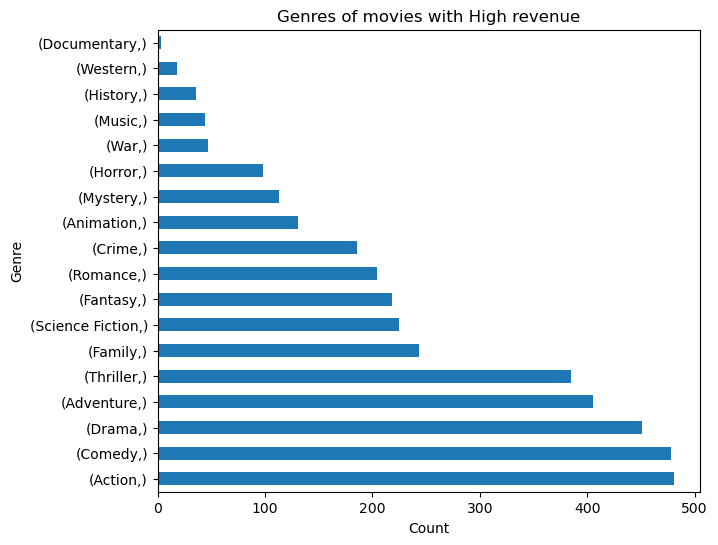

In [474]:
genres_of_high_revenue_Plot = genres_of_high_revenue.value_counts().plot(kind= 'barh',  title='Genres of movies with High revenue', figsize= (7,6));  
genres_of_high_revenue_Plot.set_xlabel("Count");
genres_of_high_revenue_Plot.set_ylabel("Genre");                                                 #Visualization of movies' genres with high revenues

### It seems that movies with high revenues are mostly Action, Comedy and Drama

## Research Question 4 : 
## Is there a relation between the movie's cast and its revenue?

In [475]:
low_revenue.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015
28,314365,4.062293,20000000,88346473,Spotlight,Mark Ruffalo|Michael Keaton|Rachel McAdams|Lie...,128,Drama|Thriller|History,Participant Media|Open Road Films|Anonymous Co...,2015
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015
35,264644,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015


In [476]:
Cast_of_low_revenue = low_revenue['cast'].str.split('|', expand=True)
Cast_of_low_revenue                                  #Splitting the column of movies' cast wih low revenues to multiple columns

,0,1,2,3,4
12,Domhnall Gleeson,Alicia Vikander,Oscar Isaac,Sonoya Mizuno,Corey Johnson
28,Mark Ruffalo,Michael Keaton,Rachel McAdams,Liev Schreiber,John Slattery
30,Ian McKellen,Milo Parker,Laura Linney,Hattie Morahan,Patrick Kennedy
35,Brie Larson,Jacob Tremblay,Joan Allen,Sean Bridgers,William H. Macy
36,Abbie Cornish,Jeffrey Dean Morgan,Colin Farrell,Anthony Hopkins,Marley Shelton
...,...,...,...,...,...
10822,Elizabeth Taylor,Richard Burton,George Segal,Sandy Dennis,Agnes Flanagan
10828,Paul Newman,Julie Andrews,Lila Kedrova,HansjÃ¶rg Felmy,Tamara Toumanova
10829,John Wayne,Robert Mitchum,James Caan,Charlene Holt,Paul Fix
10835,Steve McQueen,Richard Attenborough,Richard Crenna,Candice Bergen,Emmanuelle Arsan


In [477]:
Cast_of_low_revenue.rename(columns = {0 :'actor 1', 1:'actor 2',
                              2:'actor 3', 3:'actor 4', 4:'actor 5'}, inplace = True)
Cast_of_low_revenue                                                                 # Changing column names to be readible

,actor 1,actor 2,actor 3,actor 4,actor 5
12,Domhnall Gleeson,Alicia Vikander,Oscar Isaac,Sonoya Mizuno,Corey Johnson
28,Mark Ruffalo,Michael Keaton,Rachel McAdams,Liev Schreiber,John Slattery
30,Ian McKellen,Milo Parker,Laura Linney,Hattie Morahan,Patrick Kennedy
35,Brie Larson,Jacob Tremblay,Joan Allen,Sean Bridgers,William H. Macy
36,Abbie Cornish,Jeffrey Dean Morgan,Colin Farrell,Anthony Hopkins,Marley Shelton
...,...,...,...,...,...
10822,Elizabeth Taylor,Richard Burton,George Segal,Sandy Dennis,Agnes Flanagan
10828,Paul Newman,Julie Andrews,Lila Kedrova,HansjÃ¶rg Felmy,Tamara Toumanova
10829,John Wayne,Robert Mitchum,James Caan,Charlene Holt,Paul Fix
10835,Steve McQueen,Richard Attenborough,Richard Crenna,Candice Bergen,Emmanuelle Arsan


In [478]:
actor_1 = Cast_of_low_revenue['actor 1']

actor_2 = Cast_of_low_revenue['actor 2']

actor_3 = Cast_of_low_revenue['actor 3']

actor_4 = Cast_of_low_revenue['actor 4']

actor_5 = Cast_of_low_revenue['actor 5']

In [479]:
cast_of_low_revenue = pd.DataFrame(pd.concat([actor_1, actor_2, actor_3, actor_4, actor_5]))
cast_of_low_revenue               # Creating a dataframe with one column that contains all actors of movies with low revenues

,0
12,Domhnall Gleeson
28,Mark Ruffalo
30,Ian McKellen
35,Brie Larson
36,Abbie Cornish
...,...
10822,Agnes Flanagan
10828,Tamara Toumanova
10829,Paul Fix
10835,Emmanuelle Arsan


In [480]:
cast_of_low_revenue.rename(columns = {0 :'actors_of_low_revenues'}, inplace = True)  # Changing the column name to be readible
cast_of_low_revenue

,actors_of_low_revenues
12,Domhnall Gleeson
28,Mark Ruffalo
30,Ian McKellen
35,Brie Larson
36,Abbie Cornish
...,...
10822,Agnes Flanagan
10828,Tamara Toumanova
10829,Paul Fix
10835,Emmanuelle Arsan


In [481]:
cast_of_low_revenue.isnull().sum() #Cheking for missing values

actors_of_low_revenues    103
dtype: int64

In [482]:
cast_of_low_revenue.dropna(inplace= True)    #Deleting the rows with null values

In [483]:
cast_of_low_revenue.isnull().sum()          #Checking that rows with missing values got deleted

actors_of_low_revenues    0
dtype: int64

In [484]:
cast_of_low_revenue.shape   #Checking the dataframe shape now

(17142, 1)

In [485]:
cast_of_low_revenue.value_counts()     #Checking the number of most common actors among movies with low revenues

actors_of_low_revenues            
Robert De Niro                        41
Dennis Quaid                          31
Nicolas Cage                          29
Samuel L. Jackson                     29
Ethan Hawke                           28
                                      ..
James Faulkner                         1
James Donald                           1
James Devoti                           1
James Deen                             1
à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ     1
Length: 7429, dtype: int64

### It seems that  Robert De Niro, Dennis Quaid, Nicolas Cage, Samuel L. Jackson are the most common actors in movies with low revenues

In [486]:
high_revenue.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


In [487]:
Cast_of_high_revenue = high_revenue['cast'].str.split('|', expand=True)
Cast_of_high_revenue               #Splitting the column of movies' cast wih high revenues to multiple columns by removing pipes

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
...,...,...,...,...,...
10725,Paul Newman,Robert Redford,Katharine Ross,Strother Martin,Henry Jones
10755,John Travolta,Olivia Newton-John,Stockard Channing,Jeff Conaway,Didi Conn
10756,Roy Scheider,Lorraine Gary,Murray Hamilton,Joseph Mascolo,Jeffrey Kramer
10758,Marlon Brando,Gene Hackman,Christopher Reeve,Ned Beatty,Jackie Cooper


In [488]:
Cast_of_high_revenue.rename(columns = {0 :'actor 1', 1:'actor 2',
                              2:'actor 3', 3:'actor 4', 4:'actor 5'}, inplace = True)
Cast_of_high_revenue                                                                 # Changing column names to be readible

,actor 1,actor 2,actor 3,actor 4,actor 5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
...,...,...,...,...,...
10725,Paul Newman,Robert Redford,Katharine Ross,Strother Martin,Henry Jones
10755,John Travolta,Olivia Newton-John,Stockard Channing,Jeff Conaway,Didi Conn
10756,Roy Scheider,Lorraine Gary,Murray Hamilton,Joseph Mascolo,Jeffrey Kramer
10758,Marlon Brando,Gene Hackman,Christopher Reeve,Ned Beatty,Jackie Cooper


In [489]:
actor__1 = Cast_of_high_revenue['actor 1']

actor__2 = Cast_of_high_revenue['actor 2']

actor__3 = Cast_of_high_revenue['actor 3']

actor__4 = Cast_of_high_revenue['actor 4']

actor__5 = Cast_of_high_revenue['actor 5']

In [490]:
cast_of_high_revenue = pd.DataFrame(pd.concat([actor__1, actor__2, actor__3, actor__4, actor__5]))
cast_of_high_revenue              # Creating a dataframe with one column that contains all actors of movies with high revenues

,0
0,Chris Pratt
1,Tom Hardy
2,Shailene Woodley
3,Harrison Ford
4,Vin Diesel
...,...
10725,Henry Jones
10755,Didi Conn
10756,Jeffrey Kramer
10758,Jackie Cooper


In [491]:
cast_of_high_revenue.rename(columns = {0 :'actors_of_high_revenues'}, inplace = True) # Changing the column name to be readible
cast_of_high_revenue

,actors_of_high_revenues
0,Chris Pratt
1,Tom Hardy
2,Shailene Woodley
3,Harrison Ford
4,Vin Diesel
...,...
10725,Henry Jones
10755,Didi Conn
10756,Jeffrey Kramer
10758,Jackie Cooper


In [492]:
cast_of_high_revenue.isnull().sum() #Checking if there are missing values

actors_of_high_revenues    0
dtype: int64

In [493]:
cast_of_high_revenue.value_counts()     #Checking the number of most common actors among movies with high revenues

actors_of_high_revenues
Tom Cruise                 26
Brad Pitt                  25
Tom Hanks                  24
Sylvester Stallone         22
Matt Damon                 22
                           ..
Jay Hernandez               1
Jay Chou                    1
Jason Schwartzman           1
Jason Ritter                1
Ã“lafur Darri Ã“lafsson     1
Length: 2735, dtype: int64

### It seems that Tom Cruise, Brad Pitt and Tom Hanks are the most common actors in movies with high revenues

## Research Question 5 : 
##  Which year has the highest annual revenue?

In [494]:
df.sample(3)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
8077,9737,1.964673,19000000,141407024,Bad Boys,Will Smith|Martin Lawrence|TÃ©a Leoni|TchÃ©ky ...,118,Adventure|Drama|Action|Comedy|Thriller,Columbia Pictures|Don Simpson/Jerry Bruckheime...,1995
759,192149,1.038367,0,4507463,The Two Faces of January,Viggo Mortensen|Kirsten Dunst|Oscar Isaac|Prom...,96,Thriller,Timnick Films|StudioCanal|Working Title Films,2014
2968,1729,0.826564,55000000,127906624,The Forbidden Kingdom,Jackie Chan|Jet Li|Michael Angarano|Li Bingbin...,104,Action|Adventure|Fantasy,Casey Silver Productions|China Film Co-Product...,2008


In [495]:
years_and_revenues = pd.DataFrame(df.groupby("release_year")["revenue"].sum())
years_and_revenues                                     #Creating a new dataframe that contains the amount of revenues each year

,revenue
release_year,
1960,145005000
1961,337720188
1962,215579846
1963,187404989
1964,340981782
1965,458081854
1966,84736689
1967,737834637
1968,264732980


In [496]:
years_and_revenues.reset_index(inplace=True)       #Changing 'release year' to be a column instead of index

In [497]:
years_and_revenues.head(3)

,release_year,revenue
0,1960,145005000
1,1961,337720188
2,1962,215579846


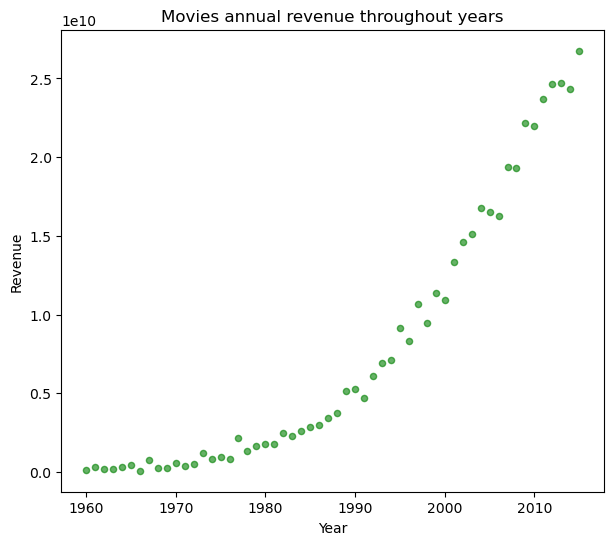

In [498]:
years_and_revenues_Plot = years_and_revenues.plot.scatter(x = 'release_year', y = 'revenue', alpha= 0.6, color="g", title='Movies annual revenue throughout years', figsize= (7,6));
years_and_revenues_Plot.set_xlabel("Year");
years_and_revenues_Plot.set_ylabel("Revenue");   #Visualization of revenues throughout years

### It is clear that the highest amount of yearly revenue is after 2010

In [499]:
years_and_revenues['revenue'].max()      #Checking the amount of highest annual revenue ever

26759924070

In [500]:
years_and_revenues[years_and_revenues['revenue'] == years_and_revenues['revenue'].max()]

#Checking the year which has the highest annual revenue ever

,release_year,revenue
55,2015,26759924070


### The highest amount of annual movies revenue was earned in 2015

## Research Question 6 : 
## Which company is the most common among movies in 2015?

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4752 non-null   int64  
 1   popularity            4752 non-null   float64
 2   budget                4752 non-null   int64  
 3   revenue               4752 non-null   int64  
 4   original_title        4752 non-null   object 
 5   cast                  4752 non-null   object 
 6   runtime               4752 non-null   int64  
 7   genres                4752 non-null   object 
 8   production_companies  4752 non-null   object 
 9   release_year          4752 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 408.4+ KB


In [502]:
df.sample(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
9204,2616,0.720081,15000000,79258538,Uncle Buck,John Candy|Jean Louisa Kelly|Macaulay Culkin|G...,100,Comedy|Drama|Family,Universal Pictures|Hughes Entertainment,1989
7140,10742,0.348086,0,12520799,The Clearing,Robert Redford|Helen Mirren|Willem Dafoe|Aless...,95,Drama|Mystery|Thriller,Fox Searchlight Pictures|Wildwood Enterprises|...,2004


In [503]:
year_and_company = df[['production_companies', 'release_year']]
year_and_company                                             #Creating a new dataframe containing the companies and year columns

,production_companies,release_year
0,Universal Studios|Amblin Entertainment|Legenda...,2015
1,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,Universal Pictures|Original Film|Media Rights ...,2015
...,...,...
10822,Chenault Productions,1966
10828,Universal Pictures,1966
10829,Paramount Pictures|Laurel Productions,1966
10835,Twentieth Century Fox Film Corporation|Solar P...,1966


In [504]:
company_2015 = year_and_company[year_and_company['release_year'] == 2015]
company_2015                                           #Creating a dataframe contains the production companies in year 2015 only

,production_companies,release_year
0,Universal Studios|Amblin Entertainment|Legenda...,2015
1,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,Universal Pictures|Original Film|Media Rights ...,2015
...,...,...
574,Verisimilitude|Kotva Films,2015
578,PF Pictures|Naked City Films,2015
583,Centropolis Entertainment|Mel's Cite du Cinema,2015
617,Sob Noisse Movies,2015


In [505]:
company_2015 = company_2015['production_companies'].str.split('|', expand=True)
company_2015                                   #Creating a dataframe contains the production companies in 2015 by removing pipes

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...
574,Verisimilitude,Kotva Films,None,None,None
578,PF Pictures,Naked City Films,None,None,None
583,Centropolis Entertainment,Mel's Cite du Cinema,None,None,None
617,Sob Noisse Movies,None,None,None,None


In [506]:
company_2015.rename(columns = {0 :'company 1', 1:'company 2',
                              2:'company 3', 3:'company 4', 4:'company 5'}, inplace = True)
company_2015                                                                            # Changing column names to be readible

,company 1,company 2,company 3,company 4,company 5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films
...,...,...,...,...,...
574,Verisimilitude,Kotva Films,None,None,None
578,PF Pictures,Naked City Films,None,None,None
583,Centropolis Entertainment,Mel's Cite du Cinema,None,None,None
617,Sob Noisse Movies,None,None,None,None


In [507]:
company_1 = company_2015['company 1']

company_2 = company_2015['company 2']

company_3 = company_2015['company 3']

company_4 = company_2015['company 4']

company_5 = company_2015['company 5']

In [508]:
companies_2015 = pd.DataFrame(pd.concat([company_1, company_2, company_3, company_4, company_5]))
companies_2015            #Creating a dataframe with one column that contains all production companies in 2015

,0
0,Universal Studios
1,Village Roadshow Pictures
2,Summit Entertainment
3,Lucasfilm
4,Universal Pictures
...,...
574,None
578,None
583,None
617,None


In [509]:
companies_2015.rename(columns = {0 :'production_companies_in_2015'}, inplace = True)
companies_2015                                                       #Changing the column name to be readible

,production_companies_in_2015
0,Universal Studios
1,Village Roadshow Pictures
2,Summit Entertainment
3,Lucasfilm
4,Universal Pictures
...,...
574,None
578,None
583,None
617,None


In [510]:
companies_2015.dropna(inplace= True)     #Deleting null values

In [511]:
companies_2015.isnull().sum()    #Checking that rows with missing values got deleted

production_companies_in_2015    0
dtype: int64

In [512]:
companies_2015.shape  #Checking the dataframe shape now

(666, 1)

In [513]:
companies_2015.value_counts()    #Checking the number of most common production companies in 2015

production_companies_in_2015
Universal Pictures              12
Warner Bros.                    12
Blumhouse Productions            9
Paramount Pictures               9
Columbia Pictures                8
                                ..
Gettin' Rad Productions          1
GFM films                        1
Fuzzy Door Productions           1
Furthur Films                    1
Zipper Bros Films                1
Length: 442, dtype: int64

### It seems that Universal Pictures, Warner Bros, Blumhouse Productions, Paramount Pictures and Columbia Pictures are the most common companies that produced the highest number of movies in 2015

## Research Question 7: 
## What are the most common genres among movies in 2015?

In [514]:
df.sample(3)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
10265,7984,0.683387,13000000,65796862,In the Name of the Father,Daniel Day-Lewis|Emma Thompson|Pete Postlethwa...,133,Drama,Universal Pictures|Hell's Kitchen Films,1993
8387,9443,0.659900,5500000,58972904,Chariots of Fire,Ben Cross|Ian Charleson|Cheryl Campbell|Alice ...,123,Drama|History,Twentieth Century Fox Film Corporation|Warner ...,1981
3453,58547,1.109807,0,201146,10 Years,Kate Mara|Channing Tatum|Rosario Dawson|Chris ...,100,Comedy|Drama,Anchor Bay Films|Temple Hill Entertainment|Bos...,2011


In [515]:
year_and_genre = df[['release_year', 'genres']]
year_and_genre                                                #Creating a dataframe contains the release year and genres columns

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller
1,2015,Action|Adventure|Science Fiction|Thriller
2,2015,Adventure|Science Fiction|Thriller
3,2015,Action|Adventure|Science Fiction|Fantasy
4,2015,Action|Crime|Thriller
...,...,...
10822,1966,Drama
10828,1966,Mystery|Thriller
10829,1966,Action|Western
10835,1966,Action|Adventure|Drama|War|Romance


In [516]:
genre_in_2015 = year_and_genre[year_and_genre['release_year'] == 2015]
genre_in_2015                                                       #Creating a dataframe contains the genres in year 2015 only

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller
1,2015,Action|Adventure|Science Fiction|Thriller
2,2015,Adventure|Science Fiction|Thriller
3,2015,Action|Adventure|Science Fiction|Fantasy
4,2015,Action|Crime|Thriller
...,...,...
574,2015,Documentary
578,2015,Documentary
583,2015,Drama
617,2015,Horror|Comedy|Drama


In [517]:
genre_in_2015 = genre_in_2015['genres'].str.split('|', expand=True)
genre_in_2015                                                       #Splitting the genres in multiple columns by removing pipes

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
574,Documentary,None,None,None,None
578,Documentary,None,None,None,None
583,Drama,None,None,None,None
617,Horror,Comedy,Drama,None,None


In [518]:
genre_in_2015.rename(columns = {0 :'genre 1', 1:'genre 2',
                              2:'genre 3', 3:'genre 4', 4:'genre 5'}, inplace = True)
genre_in_2015                                                                            # Changing column names to be readible

,genre 1,genre 2,genre 3,genre 4,genre 5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
574,Documentary,None,None,None,None
578,Documentary,None,None,None,None
583,Drama,None,None,None,None
617,Horror,Comedy,Drama,None,None


In [519]:
genre1 = genre_in_2015['genre 1']

genre2 = genre_in_2015['genre 2']

genre3 = genre_in_2015['genre 3']

genre4 = genre_in_2015['genre 4']

genre5 = genre_in_2015['genre 5']

In [520]:
genres_in_2015 = pd.DataFrame(pd.concat([genre1, genre2, genre3, genre4, genre5]))
genres_in_2015                                  #Creating a dataframe with one column contains all genres of movies in 2015

,0
0,Action
1,Action
2,Adventure
3,Action
4,Action
...,...
574,None
578,None
583,None
617,None


In [521]:
genres_in_2015.rename(columns = {0 :'genres_in_2015'}, inplace = True)
genres_in_2015                                                          #Changing column name to be readible

,genres_in_2015
0,Action
1,Action
2,Adventure
3,Action
4,Action
...,...
574,None
578,None
583,None
617,None


In [522]:
genres_in_2015.dropna(inplace=True)     #Deleting null values

In [523]:
genres_in_2015.isnull().sum()  #Checking that rows with missing values got deleted

genres_in_2015    0
dtype: int64

In [524]:
genres_in_2015.shape   #Checking the dataframe shape now

(514, 1)

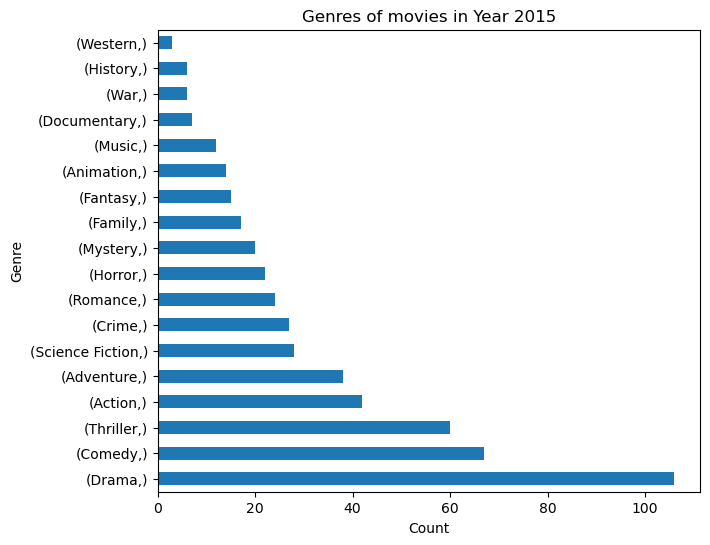

In [525]:
genres_in_2015_Plot = genres_in_2015.value_counts().plot(kind= 'barh',  title='Genres of movies in Year 2015', figsize= (7,6));  
genres_in_2015_Plot.set_xlabel("Count");
genres_in_2015_Plot.set_ylabel("Genre");           #Visualization of movies' genres in year 2015

### It seems that Drama, Comedy and Thriller are the most common genres in movies produced in 2015

<a id='conclusions'></a>
## Conclusions

# Step 1:
## To know what leads to movies with high revenues, I started by exploring the relation between the movie's revenue and its popuarity in a scatter plot. Then, the relation between the movie's runtime and its revenue in a scatter plot.
## Result: I found that there is NO strong correlation between movie's revenue with its popularity or its runtime.

# Step 2:
## To check whether movie's genre and movie's cast affect the movie's revenue, I created 2 dataframes. The dataframe of low revenues contains the movies whose revenues are less than the average revenues. And the dataframe of high revenues contains the movies whose revenues are greater than the average revenues.
## Result: I found that movies with low revenues are mostly Drama, Comedy and Thriller and the movies with high revenues are mostly Action, Comedy and Drama.

## To make it easier for the next film producers to know if a "specific movie's genre" has propability of getting high or low revenues, I created the following:

In [526]:
''' Check the percentage of "specific genre" among high revenue '''


(genres_of_high_revenue[genres_of_high_revenue['genres_of_high_revenues'] == 'Action'].value_counts() / genres_of_high_revenue.value_counts().sum()) * 100

genres_of_high_revenues
Action                     12.772172
dtype: float64

## This code calculates the percentage of "specific genre" among the movies' genres with high revenues. 
## In this example, it calculated the percentage of "Action" among movies' genres with high revenues.

In [527]:
''' Check the percentage of "specific genre" among low revenue '''


(genres_of_low_revenue[genres_of_low_revenue['genres_of_low_revenues'] == 'Action'].value_counts() / genres_of_low_revenue.value_counts().sum()) * 100

genres_of_low_revenues
Action                    8.848946
dtype: float64

## This code calculates the percentage of "specific genre" among the movies' genres with low revenues. 
## In this example, it calculated the percentage of "Action" among movies' genres with low revenues.

## Result: By using the above two codes, the film producers will be able to check the probability of a genre to get high or low revenue by comparing the two percentages. However, the film producers cannot rely only on these probabilities to determine the movie's chance of success because there might be other factors affecting the revenues as well.

# Step 3:
## I checked the most common actors who were in movies with low  revenues.
## Result: I found that Robert De Niro, Dennis Quaid, Nicolas Cage, Samuel L. Jackson are the most common actors in movies with low revenues. 

## Then, I checked the most common actors who were in movies with high revenues. 
## Result: I found that Tom Cruise, Brad Pitt and Tom Hanks are the most common actors in movies with high revenues.

## Conclusion of step 3: The actors in movies may have effect on movie's revenue.

# Step 4:
## To check when was the highest annual revenue earned from movies, I created a dataframe contains the amount of revenues each year. Then, created a visulization to show the amount of annual revenues every year.
## Result: I found that the highest amount of annual revenue was earned in 2015.


# Step 5:
## To check the most common production companies in 2015, I created a dataframe that contains all the production companies in year 2015.
## Result: I found that Universal Pictures, Warner Bros, Blumhouse Productions, Paramount Pictures and Columbia Pictures are the most common companies that produced movies in 2015.

# Step 6:
## To check the most common genres of movies produced in 2015, I created a dataframe that contains the movies' genres in 2015.
## Result: I found that Drama, Comedy and Thriller are the most common genres in movies produced in 2015.
## This contradicts the result I found in Step 2 (above) in which Drama, Comedy and Thriller were among the most common movies' genres that have low revenues! Although, Drama, Comedy and Thriller are the most common genres in 2015 which achieved the highest annual revenue.
## So, it seems that there are other factors affect the movies' revenues and we cannot only rely on the movie's genre to predict its revenue.

# Suggestions:
## First, it would be helpful if there was a column contains the names of cinemas where each movie was showed. I would check if cinemas affect the movie's revenue.
## Second, it would be helpful if there was a column contains the places/websites in which advertisements were made about the movie before it got released. I would check if advertisement sites affect the movie's revenue.
## Third, it would be helpful if there was a column contains the ticket price of each movie relative to other movies in that time (month, day or year). I would check if the ticket price affect the movie's revenue.
## Fourth, it would be helpful if there was a column contains if a movie tickets had special sales (low ticket price) and another column contains the number of sold tickets. I would check if movie ticket sales affect the number of sold tickets which may consequently affect the movie's revenue.
## Fifth, it would be helpful if there was a column contains whether the movie is based on a true story or not, I would check if movies based on a true story have similar revenues or not.

# Limitations of the current dataset:

## (1) It contains the movies which were produced until the year 2015 Only.
## (2) It does Not contain a column which indicates whether each movie's idea is original or taken from an old novel or foreign movie.
## (3) It does Not contain a column that includes the graphic effects (photoshop edits) used in creating each movie.